**GUYS DISCLAIMER INI AKU NGETEST DOANG YA **

In [1]:
import os
import time
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
file_dir = '/content/drive/MyDrive/BANGKIT/DATASETS/DATASET'
train_dir = os.path.join(file_dir, 'TRAIN')
valid_dir = os.path.join(file_dir, 'TEST')
test_dir = os.path.join(file_dir, 'TEST')

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   fill_mode='reflect',
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=60)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_gen = train_datagen.flow_from_directory(train_dir, 
                                         target_size=(128,128), 
                                         batch_size=128,
                                         class_mode="categorical")

testing_gen = test_datagen.flow_from_directory(test_dir, 
                                               target_size=(128,128), 
                                               batch_size=128,
                                               class_mode="categorical")

validation_gen = val_datagen.flow_from_directory(valid_dir, 
                                             target_size=(128,128), 
                                             batch_size=128,
                                             class_mode="categorical")

Found 2791 images belonging to 6 classes.
Found 739 images belonging to 6 classes.
Found 739 images belonging to 6 classes.


In [5]:
print("Train/Validation indicies: ", train_gen.class_indices)
print("\n0 stands for Buah \"B\" \n1 stands for Cangkang Telur \"C\" \n2 stands for Daun \"D\"\n3 stands for Ranting \"R\"\n4 stands for Sayur \"S\"\n5 stands for Tulang \"T\"")

Train/Validation indicies:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

0 stands for Buah "B" 
1 stands for Cangkang Telur "C" 
2 stands for Daun "D"
3 stands for Ranting "R"
4 stands for Sayur "S"
5 stands for Tulang "T"


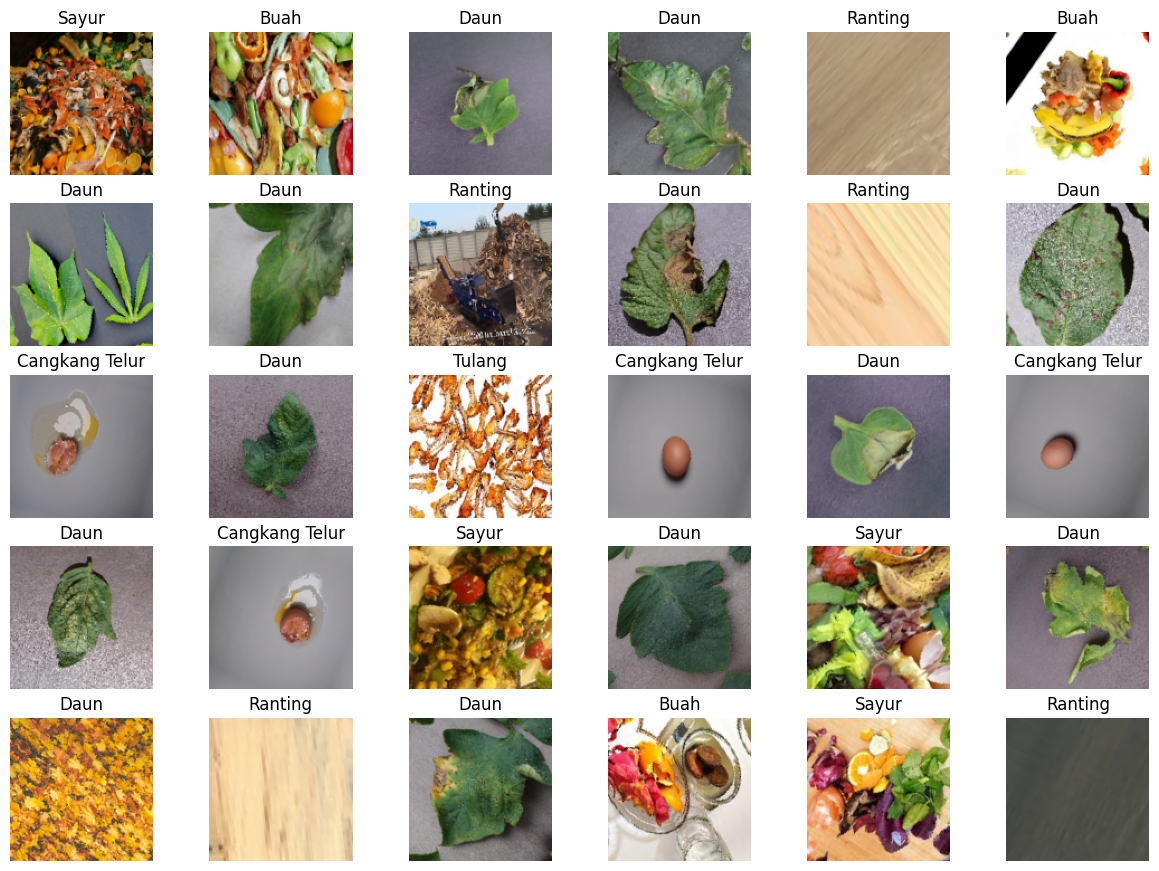

In [6]:
img, labels = next(train_gen)
plt.figure(figsize=(15, 13))
for i in range(30):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(img[i])
    if labels[i][0] == 1:
        plt.title("Buah")
    elif labels[i][1] == 1:
        plt.title("Cangkang Telur")
    elif labels[i][2] == 1:
        plt.title("Daun")
    elif labels[i][3] == 1:
        plt.title("Ranting")
    elif labels[i][4] == 1:
        plt.title("Sayur")
    else:
        plt.title("Tulang")
    plt.axis("off")
del img
del labels

In [7]:
model = tf.keras.Sequential()

In [8]:
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [9]:
#model = Sequential([base_model, 
#                      AveragePooling2D(pool_size=(pool_size ,pool_size)),      
#                      Flatten(), 
#                      Dense(64, activation='relu'),
#                      Dropout(dropout), 
#                      Dense(16, activation='relu'),
#                      Dense(2, activation='sigmoid', kernel_regularizer=l2(regularizer)),
#  ])


In [10]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [11]:
model.compile(optimizer='Adam',loss='CategoricalCrossentropy', metrics=['accuracy'])

In [12]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

best_model = ModelCheckpoint('bestmodel.hdf5', monitor='val_loss', save_best_only=True)

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.90):
      print("\n sudah mencapai 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [14]:
callbacks = myCallback()

In [15]:
#history, model = trainable_model(x_train, y_train, x_val, y_val, x_test, y_test,
#                                 fine_tuning=True, epochs=20, base_model='Xception', 
#                                 dropout=0.05, regularizer=0.1, batch_size=32,
#                                 callbacks=callbacks, summary=True, checkpoint=checkpoints)

In [16]:
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[best_model, early_stopping_monitor]
)

Epoch 1/50
22/22 [==============================] - 788s 36s/step - loss: 1.8050 - accuracy: 0.5163 - val_loss: 1.3920 - val_accuracy: 0.6008
Epoch 2/50
22/22 [==============================] - 90s 4s/step - loss: 1.0420 - accuracy: 0.7854 - val_loss: 1.0687 - val_accuracy: 0.6779
Epoch 3/50
22/22 [==============================] - 96s 4s/step - loss: 0.7963 - accuracy: 0.8155 - val_loss: 0.9874 - val_accuracy: 0.7091
Epoch 4/50
22/22 [==============================] - 91s 4s/step - loss: 0.7062 - accuracy: 0.8255 - val_loss: 0.9466 - val_accuracy: 0.6982
Epoch 5/50
22/22 [==============================] - 90s 4s/step - loss: 0.6522 - accuracy: 0.8320 - val_loss: 0.8329 - val_accuracy: 0.7280
Epoch 6/50
22/22 [==============================] - 90s 4s/step - loss: 0.5985 - accuracy: 0.8452 - val_loss: 0.9013 - val_accuracy: 0.7240
Epoch 7/50
22/22 [==============================] - 90s 4s/step - loss: 0.6135 - accuracy: 0.8413 - val_loss: 0.8854 - val_accuracy: 0.7388
Epoch 8/50
22/22 [

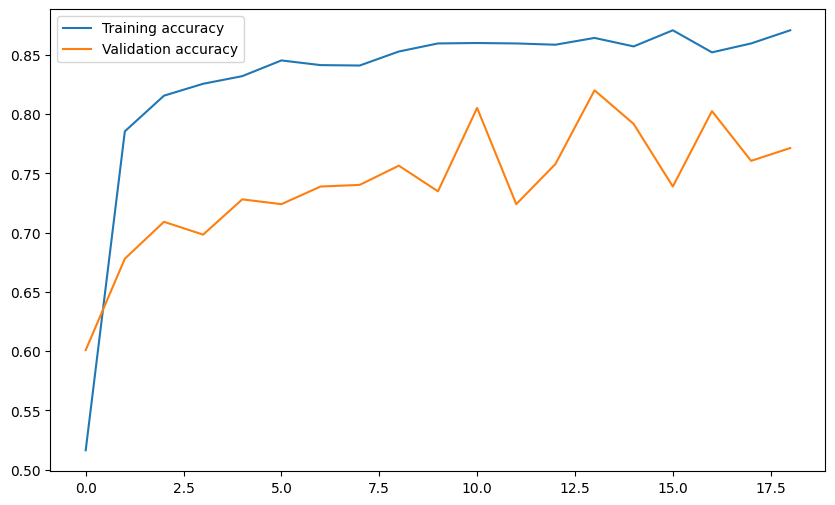

In [17]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Training accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

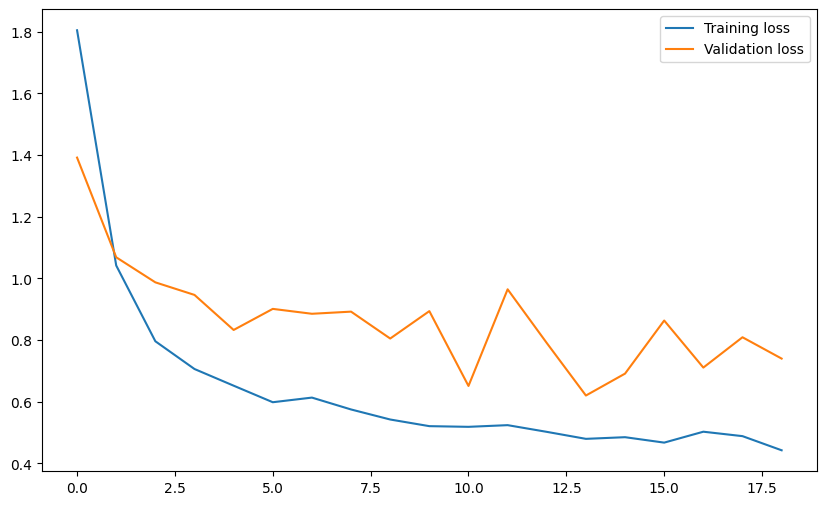

In [18]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = "Training loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [19]:
model.load_weights('bestmodel.hdf5')
model.evaluate(validation_gen);

6/6 [==============================] - 9s 1s/step - loss: 0.6203 - accuracy: 0.8200


In [20]:
def predict_func(img): 
    result = model.predict(img)
    return result

4/4 [==============================] - 1s 284ms/step


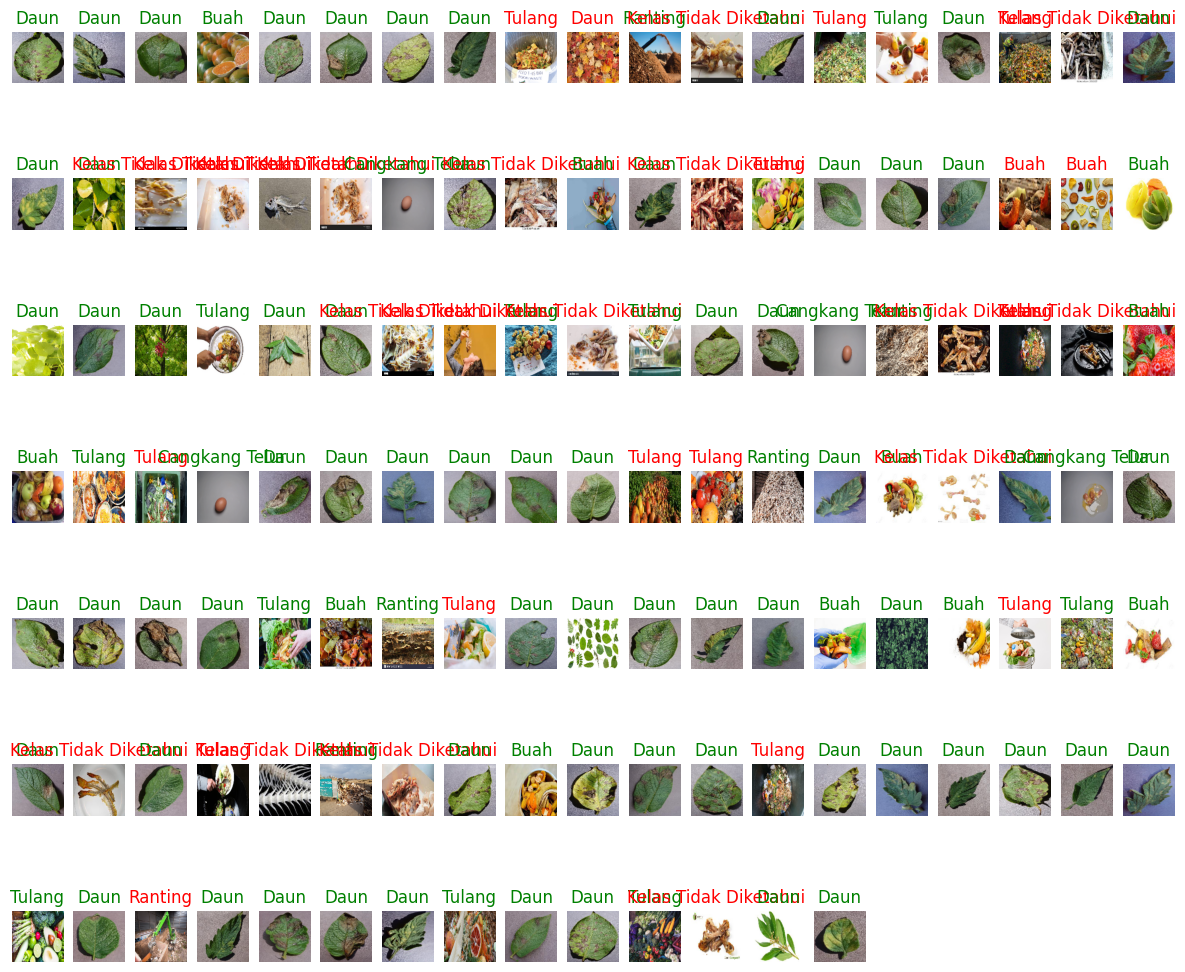

In [21]:
img, _ = next(validation_gen)
plt.figure(figsize=(15, 13))
result = model.predict(img)

class_labels = {
    0: "Buah",
    1: "Cangkang Telur",
    2: "Daun",
    3: "Ranting",
    4: "Tulang"
}

n_images = len(img)
n_rows = 7
n_cols = (n_images // n_rows) + 1

for i in range(n_images):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(img[i])
    
    predicted_label = result[i].argmax()
    true_label = _[i].argmax()
    
    if true_label in class_labels:
        if predicted_label == true_label:
            plt.title(class_labels[true_label], color='green')
        else:
            plt.title(class_labels[true_label], color='red')
    else:
        plt.title("Kelas Tidak Diketahui", color='red')
        
    plt.axis("off")

plt.show()

In [22]:
model.save('model.h5')

In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)